<a href="https://www.kaggle.com/code/seunayegboyin/bulldozer-sales-price-prediction-with-randomforest?scriptVersionId=121899606" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Problem defition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score,
                            mean_squared_error,
                            mean_absolute_error)
from sklearn.model_selection import RandomizedSearchCV
import pickle
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Data Importation

In [2]:
data_test=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/Test.csv')
data_test.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
9571,6468554,2522788,22117,121,3,2006,NaN,NaN,11/15/2012 0:00,50DZTS,...,None or Unspecified,None or Unspecified,Hydraulic,Yes,Double,NaN,NaN,NaN,NaN,NaN
3104,6260525,68821,1584,149,2,1000,NaN,NaN,6/23/2012 0:00,D5HIILGP,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
6714,6310360,1809304,9550,149,99,1993,NaN,NaN,5/23/2012 0:00,753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9768,6469311,2522461,9518,121,3,2007,NaN,NaN,11/8/2012 0:00,463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5294,6284390,1878630,14350,149,10,2005,NaN,NaN,5/24/2012 0:00,50CZTS,...,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
data_test.shape

(12457, 52)

In [4]:
df=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv')
df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
285168,2196323,13500.0,1732795,3140,136,NaN,1979,0.0,NaN,1/19/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
34953,1270910,6500.0,1164639,3112,132,1.0,1995,NaN,NaN,11/14/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73169,1359419,97000.0,1255722,7070,132,6.0,1995,1200.0,High,12/6/1996 0:00,...,24 inch,"9' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
117680,1456132,47500.0,1280771,4147,132,1.0,1977,NaN,NaN,5/13/1999 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
412449,6324719,11900.0,1908459,19381,149,99.0,2005,NaN,NaN,4/25/2012 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(412698, 53)

In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,...,11500.0,13000.0,20500.0,13000.0,10000.0,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00,12/18/2008 0:00,8/26/2004 0:00,11/17/2005 0:00,8/27/2009 0:00,8/9/2007 0:00,...,2/13/2012 0:00,1/28/2012 0:00,1/28/2012 0:00,1/28/2012 0:00,2/13/2012 0:00,3/7/2012 0:00,1/28/2012 0:00,1/28/2012 0:00,3/7/2012 0:00,1/28/2012 0:00


In [7]:
data_machineappendix=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv')
data_machineappendix.sample(5)

,MachineID,ModelID,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,ProductGroup,ProductGroupDesc,MfgYear,fiManufacturerID,fiManufacturerDesc,PrimarySizeBasis,PrimaryLower,PrimaryUpper
270435,1297136,4604,310E,310,E,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1998.0,43,John Deere,Standard Digging Depth - Ft,14.0,15.0
128864,1453266,4123,D6C,D6,C,NaN,NaN,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",TTT,Track Type Tractors,1971.0,26,Caterpillar,Horsepower,130.0,160.0
50387,1032365,2147,SK220LC,SK220,NaN,NaN,LC,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",TEX,Track Excavators,1991.0,99,Kobelco,Weight - Metric Tons,21.0,24.0
205165,654339,7057,312,312,NaN,NaN,NaN,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",TEX,Track Excavators,1995.0,26,Caterpillar,Weight - Metric Tons,12.0,14.0
308179,1338859,4700,544G,544,G,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,WL,Wheel Loader,1996.0,43,John Deere,Horsepower,120.0,135.0


In [8]:
data_machineappendix.shape

(358593, 16)

In [9]:
data_dictionary=pd.read_excel('/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx')
data_dictionary

,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


In [10]:
valid=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/Valid.csv')
valid.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
7258,6275628,160510,3787,149,1,2009,NaN,NaN,2/13/2012 0:00,930H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
4130,4372263,2303133,9552,172,1,2000,2056.0,Low,3/26/2012 0:00,773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1286,4246428,2303594,6912,172,1,2003,4014.0,Medium,2/12/2012 0:00,CX210,...,None or Unspecified,None or Unspecified,Hydraulic,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
7834,6282271,1878836,4721,149,1,1978,NaN,NaN,2/13/2012 0:00,570A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6031,6266410,1884671,3877,149,1,1980,NaN,NaN,3/27/2012 0:00,980C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [11]:
valid.shape

(11573, 52)

In [12]:
validsolution=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv')
validsolution.sample(5)

,SalesID,SalePrice,Usage
1365,4249077,78000.0,PublicTest
6753,6271366,37000.0,PublicTest
1845,4267311,24000.0,PublicTest
214,1223696,49000.0,PublicTest
3923,4362083,87500.0,PublicTest


In [13]:
validsolution.shape

(11573, 3)

In [14]:
median_benchmark=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv')
median_benchmark.sample(5)

,SalesID,SalePrice
7185,6313045,13920.0
10926,6629393,37400.0
1847,4512579,66950.0
5571,6286344,21315.0
10485,6625106,134390.0


In [15]:
median_benchmark.shape

(12457, 2)

In [16]:
random_forest_benchmark=pd.read_csv('/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv')
random_forest_benchmark.sample(5)

,SalesID,SalePrice
5796,6287993,62765.0
364,1229052,21280.0
1005,4247587,6533.0
7334,6317146,54730.0
5733,6287555,18360.0


## Data Exploration

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [18]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [19]:
df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
212752,1671569,8000.0,1269650,8585,132,1.0,1987,NaN,NaN,9/29/1995 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395946,6279028,25000.0,1922249,1229,149,12.0,1993,NaN,NaN,9/21/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
26560,1254056,17500.0,1101090,3170,132,6.0,1987,NaN,NaN,4/7/1998 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278388,1844148,10750.0,1220919,10437,132,18.0,1972,NaN,NaN,10/21/1989 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
59540,1318714,32000.0,1471384,3538,132,1.0,1998,NaN,NaN,12/13/2000 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.select_dtypes(include='object').sample(5)

,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
103861,NaN,3/2/1993 0:00,D9G,D9,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 260.0 + Horsepower",Georgia,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
268399,NaN,5/28/2008 0:00,863G,863,G,NaN,NaN,NaN,Skid Steer Loader - 1751.0 to 2201.0 Lb Operat...,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258227,NaN,12/16/2008 0:00,325G,325,G,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Maryland,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
268268,NaN,2/11/2008 0:00,863G,863,G,NaN,NaN,NaN,Skid Steer Loader - 1751.0 to 2201.0 Lb Operat...,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82429,NaN,11/18/1998 0:00,D6H,D6,H,NaN,NaN,Medium,"Track Type Tractor, Dozer - 160.0 to 190.0 Hor...",Texas,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,U,None or Unspecified,NaN,NaN


In [21]:
df.describe(include='all')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,73670,412698,...,102916,102261,102332,102261,102193,80712,81875,81877,71564,71522
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4013,...,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2/16/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35832,1932,...,82444,81539,85074,92924,86998,80692,39633,71447,70169,70774
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [23]:
df.shape

(412698, 53)

## Data Cleaning

Text(0.5, 1.0, 'Total number of Null value')

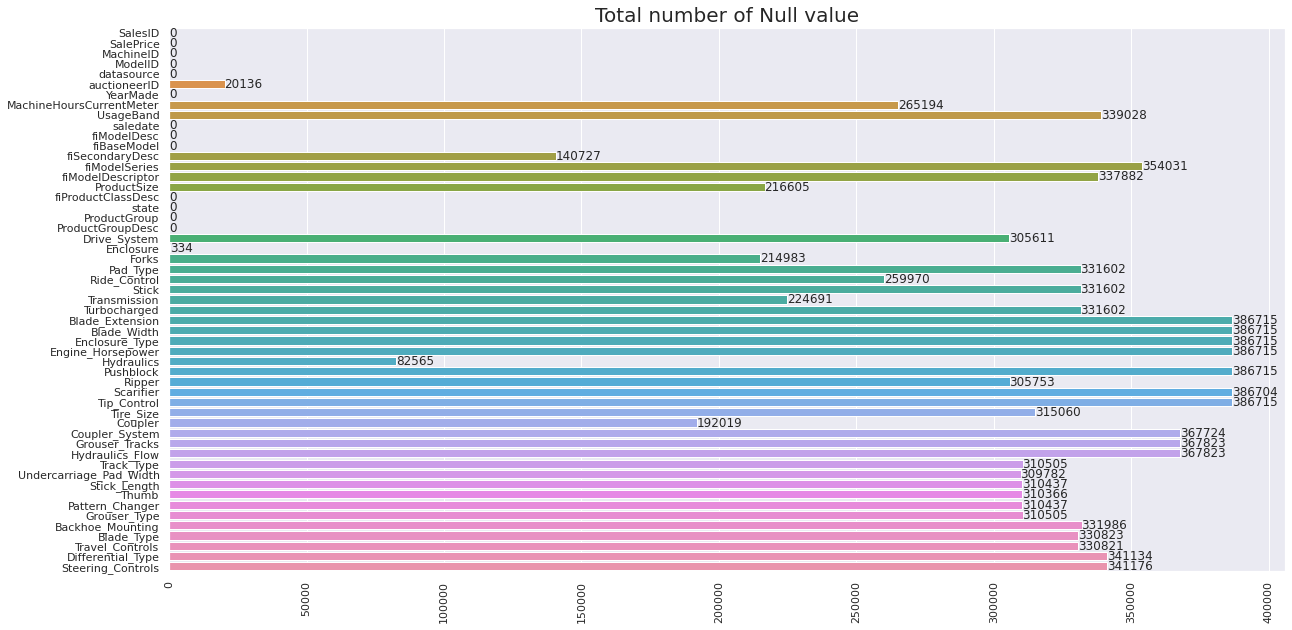

In [24]:
# visualization before cleaning
plt.figure(figsize=(20,10))
plots=sns.barplot(y=df.isna().sum().index,x=df.isna().sum())
plt.xticks(rotation=90)
plt.bar_label(plots.containers[0],rotation=0)
plt.title('Total number of Null value',fontsize=20)

In [25]:
df.fillna(method='ffill',inplace=True)

Text(0.5, 1.0, 'After Cleaning')

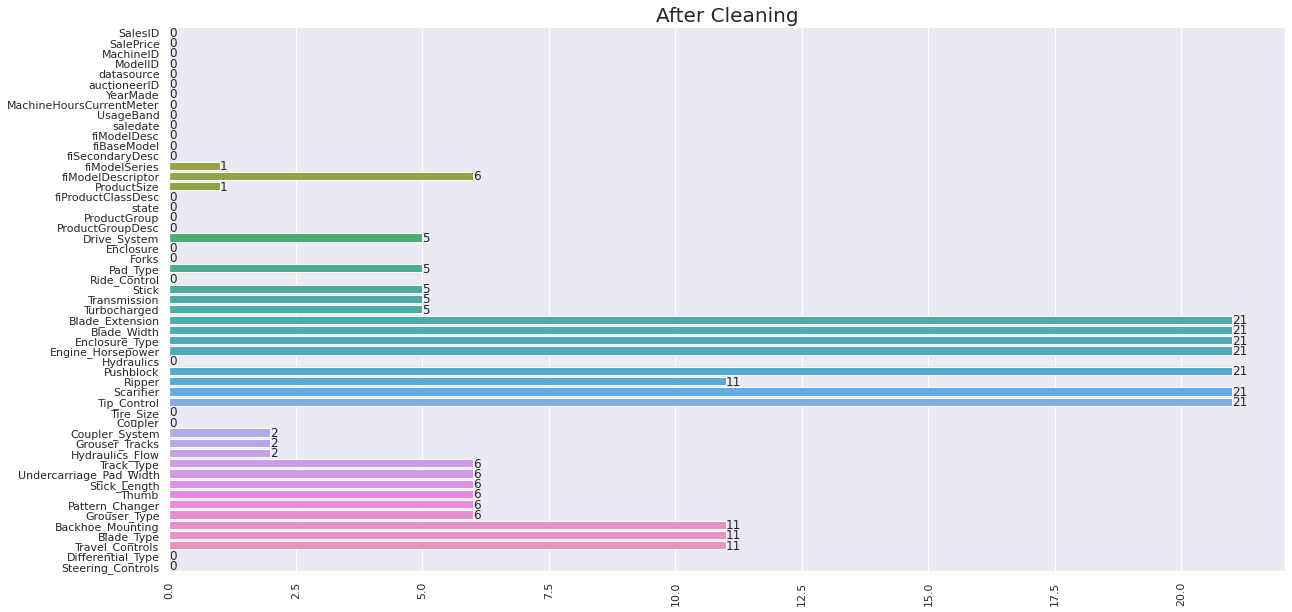

In [26]:
# Visualization after cleaning
plt.figure(figsize=(20,10))
plots=sns.barplot(y=df.isna().sum().index,x=df.isna().sum())
plt.xticks(rotation=90)
plt.bar_label(plots.containers[0],rotation=0)
plt.title('After Cleaning',fontsize=20)

In [27]:
df.dropna(axis=0,how='any',inplace=True)

In [28]:
df.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

In [29]:
df.select_dtypes(exclude='object').isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
dtype: int64

## Data Visualization

Text(0.5, 0.98, 'Frequency')

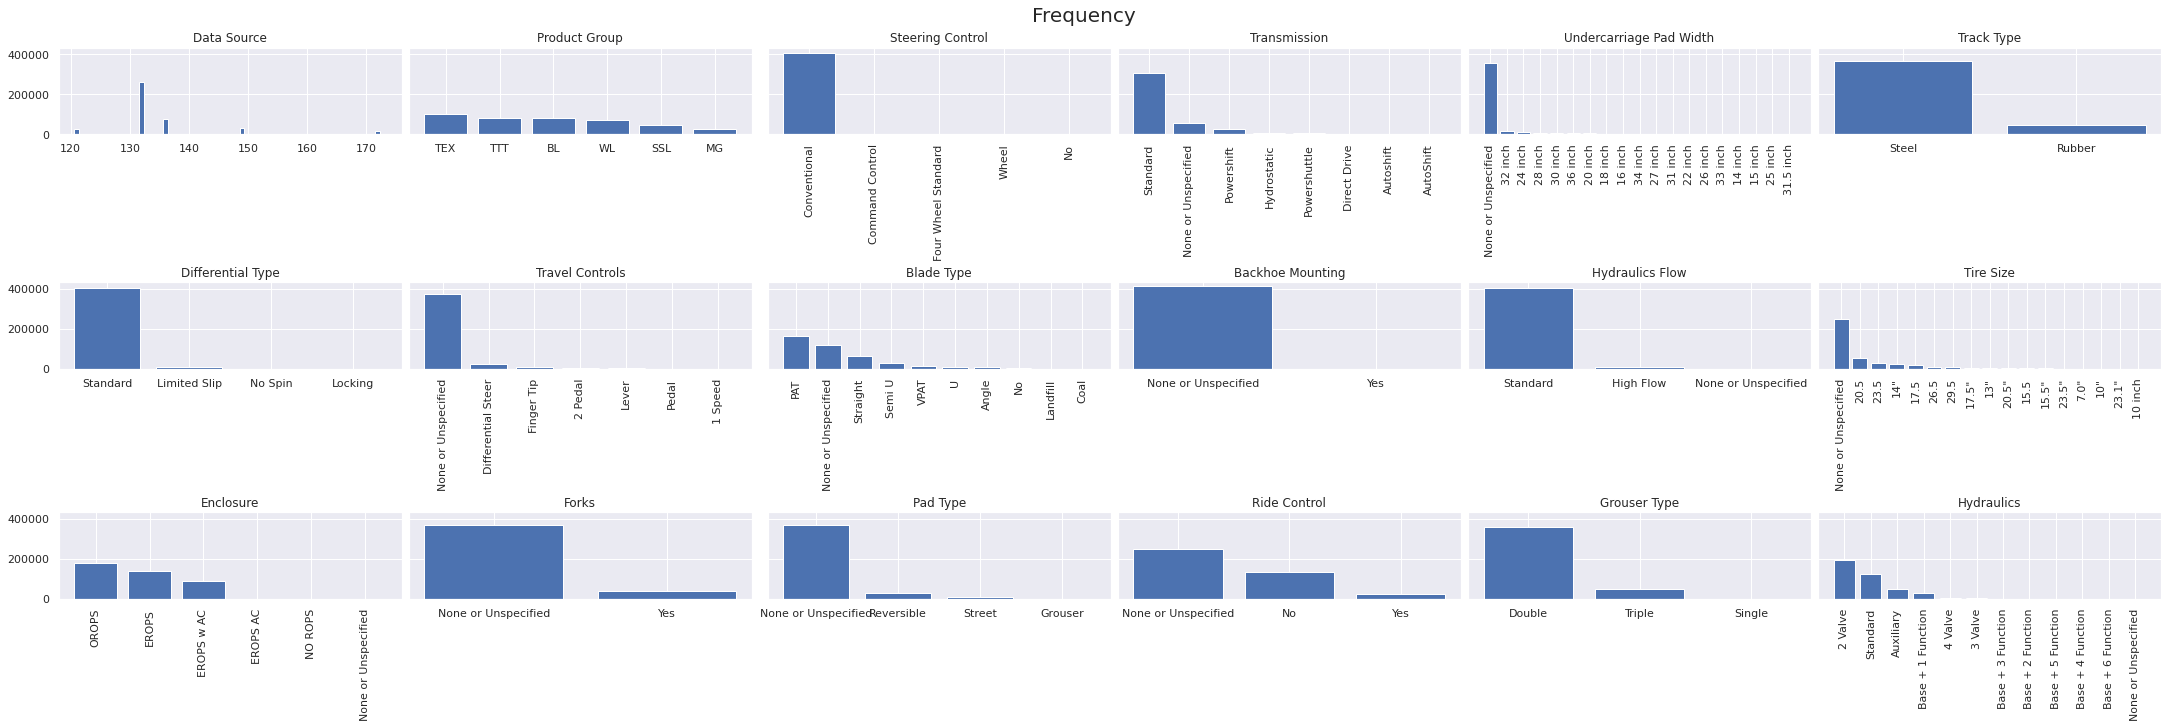

In [30]:
fig, axs = plt.subplots(3, 6, figsize=(30, 10), sharey=True,layout='constrained')
# Data Source
axs[0,0].bar(df.datasource.value_counts().index,df.datasource.value_counts())
axs[0,0].set_title('Data Source')
# Product Group
axs[0,1].bar(df.ProductGroup.value_counts().index,df.ProductGroup.value_counts())
axs[0,1].set_title('Product Group')
# Sterling controls
axs[0,2].bar(df.Steering_Controls.value_counts().index,df.Steering_Controls.value_counts())
axs[0,2].set_title('Steering Control')
axs[0,2].set_xticklabels(df.Steering_Controls.value_counts().index,rotation=90)
# Transmission
axs[0,3].bar(df.Transmission.value_counts().index,df.Transmission.value_counts())
axs[0,3].set_xticklabels(df.Transmission.value_counts().index,rotation=90)
axs[0,3].set_title('Transmission')
# Undercarriage Pad Width
axs[0,4].bar(df.Undercarriage_Pad_Width.value_counts().index,df.Undercarriage_Pad_Width.value_counts())
axs[0,4].set_xticklabels(df.Undercarriage_Pad_Width.value_counts().index,rotation=90)
axs[0,4].set_title('Undercarriage Pad Width')
# Track Type
axs[0,5].bar(df.Track_Type.value_counts().index,df.Track_Type.value_counts())
axs[0,5].set_title('Track Type')

# Differential Type
axs[1,0].bar(df.Differential_Type.value_counts().index,df.Differential_Type.value_counts())
axs[1,0].set_title('Differential Type')
# Travel Controls
axs[1,1].bar(df.Travel_Controls.value_counts().index,df.Travel_Controls.value_counts())
axs[1,1].set_xticklabels(df.Travel_Controls.value_counts().index,rotation=90)
axs[1,1].set_title('Travel Controls')
# Blade Type
axs[1,2].bar(df.Blade_Type.value_counts().index,df.Blade_Type.value_counts())
axs[1,2].set_title('Blade Type')
axs[1,2].set_xticklabels(df.Blade_Type.value_counts().index,rotation=90)
# Backhoe Mounting
axs[1,3].bar(df.Backhoe_Mounting.value_counts().index,df.Backhoe_Mounting.value_counts())
axs[1,3].set_title('Backhoe Mounting')
# Hydraulics Flow
axs[1,4].bar(df.Hydraulics_Flow.value_counts().index,df.Hydraulics_Flow.value_counts())
axs[1,4].set_title('Hydraulics Flow')
# Tire Size
axs[1,5].bar(df.Tire_Size.value_counts().index,df.Tire_Size.value_counts())
axs[1,5].set_xticklabels(df.Tire_Size.value_counts().index,rotation=90)
axs[1,5].set_title('Tire Size')
# Enclosure
axs[2,0].bar(df.Enclosure.value_counts().index,df.Enclosure.value_counts())
axs[2,0].set_xticklabels(df.Enclosure.value_counts().index,rotation=90)
axs[2,0].set_title('Enclosure')
# Forks
axs[2,1].bar(df.Forks.value_counts().index,df.Forks.value_counts())
axs[2,1].set_title('Forks')
# Pad Type
axs[2,2].bar(df.Pad_Type.value_counts().index,df.Pad_Type.value_counts())
axs[2,2].set_title('Pad Type')
# Ride Control
axs[2,3].bar(df.Ride_Control.value_counts().index,df.Ride_Control.value_counts())
axs[2,3].set_title('Ride Control')
# Grouser Type
axs[2,4].bar(df.Grouser_Type.value_counts().index,df.Grouser_Type.value_counts())
axs[2,4].set_title('Grouser Type')
# Hydraulics
axs[2,5].bar(df.Hydraulics.value_counts().index,df.Hydraulics.value_counts())
axs[2,5].set_xticklabels(df.Hydraulics.value_counts().index,rotation=90)
axs[2,5].set_title('Hydraulics')

fig.suptitle('Frequency', fontsize=20)

Text(0.5, 0.98, 'Frequency')

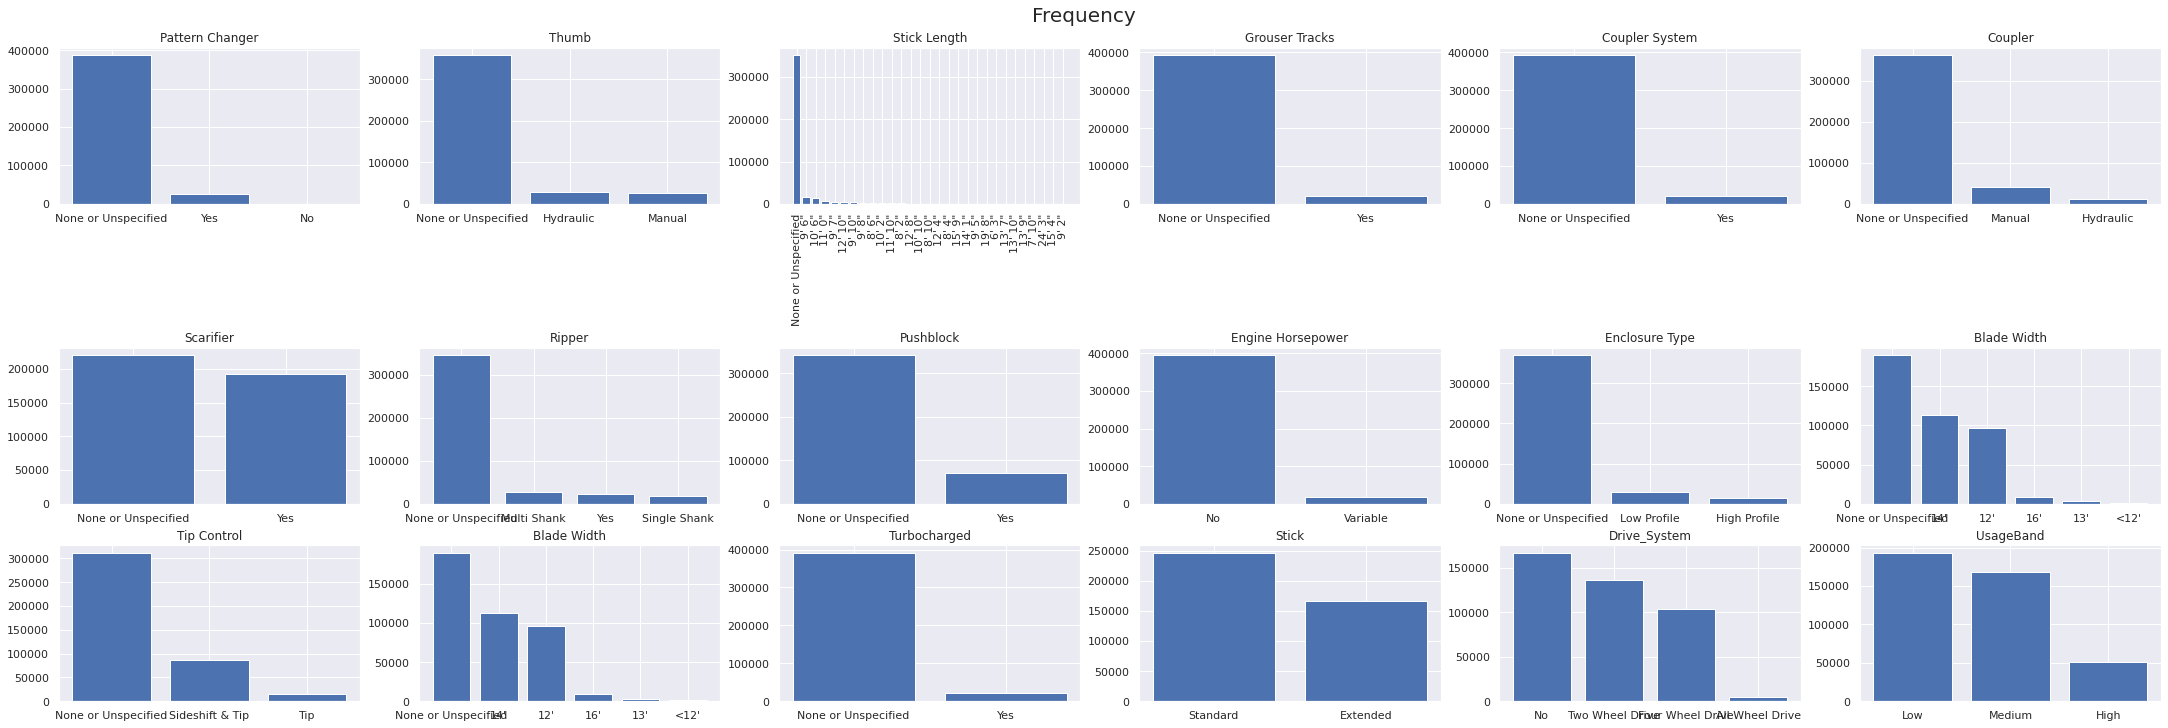

In [31]:
fig, axs= plt.subplots(3,6,figsize=(30,10),layout='constrained')
# Pattern Changer
axs[0,0].bar(df.Pattern_Changer.value_counts().index,df.Pattern_Changer.value_counts())
axs[0,0].set_title('Pattern Changer')
# Thumb
axs[0,1].bar(df.Thumb.value_counts().index,df.Thumb.value_counts())
axs[0,1].set_title('Thumb')
# Stick_Length
axs[0,2].bar(df.Stick_Length.value_counts().index,df.Stick_Length.value_counts())
axs[0,2].set_title('Stick Length')
axs[0,2].set_xticklabels(df.Stick_Length.value_counts().index,rotation=90)
# Grouser Tracks
axs[0,3].bar(df.Grouser_Tracks.value_counts().index,df.Grouser_Tracks.value_counts())
axs[0,3].set_title('Grouser Tracks')
# Coupler System
axs[0,4].bar(df.Coupler_System.value_counts().index,df.Coupler_System.value_counts())
axs[0,4].set_title('Coupler System')
# Coupler
axs[0,5].bar(df.Coupler.value_counts().index,df.Coupler.value_counts())
axs[0,5].set_title('Coupler')

# Scarifier
axs[1,0].bar(df.Scarifier.value_counts().index,df.Scarifier.value_counts())
axs[1,0].set_title('Scarifier')
# Ripper
axs[1,1].bar(df.Ripper.value_counts().index,df.Ripper.value_counts())
axs[1,1].set_title('Ripper')
# Pushblock
axs[1,2].bar(df.Pushblock.value_counts().index,df.Pushblock.value_counts())
axs[1,2].set_title('Pushblock')
# Engine Horsepower
axs[1,3].bar(df.Engine_Horsepower.value_counts().index,df.Engine_Horsepower.value_counts())
axs[1,3].set_title('Engine Horsepower')
# Enclosure Type
axs[1,4].bar(df.Enclosure_Type.value_counts().index,df.Enclosure_Type.value_counts())
axs[1,4].set_title('Enclosure Type')
# Blade Width
axs[1,5].bar(df.Blade_Width.value_counts().index,df.Blade_Width.value_counts())
axs[1,5].set_title('Blade Width')

# Tip Control
axs[2,0].bar(df.Tip_Control.value_counts().index,df.Tip_Control.value_counts())
axs[2,0].set_title('Tip Control')
# Blade Width
axs[2,1].bar(df.Blade_Width.value_counts().index,df.Blade_Width.value_counts())
axs[2,1].set_title('Blade Width')
# Turbocharged
axs[2,2].bar(df.Turbocharged.value_counts().index,df.Turbocharged.value_counts())
axs[2,2].set_title('Turbocharged')
# Stick
axs[2,3].bar(df.Stick.value_counts().index,df.Stick.value_counts())
axs[2,3].set_title('Stick')
# Drive System
axs[2,4].bar(df.Drive_System.value_counts().index,df.Drive_System.value_counts())
axs[2,4].set_title('Drive_System')
# UsageBand
axs[2,5].bar(df.UsageBand.value_counts().index,df.UsageBand.value_counts())
axs[2,5].set_title('UsageBand')
fig.suptitle('Frequency', fontsize=20)

Text(0.5, 1.0, 'Frequency by state')

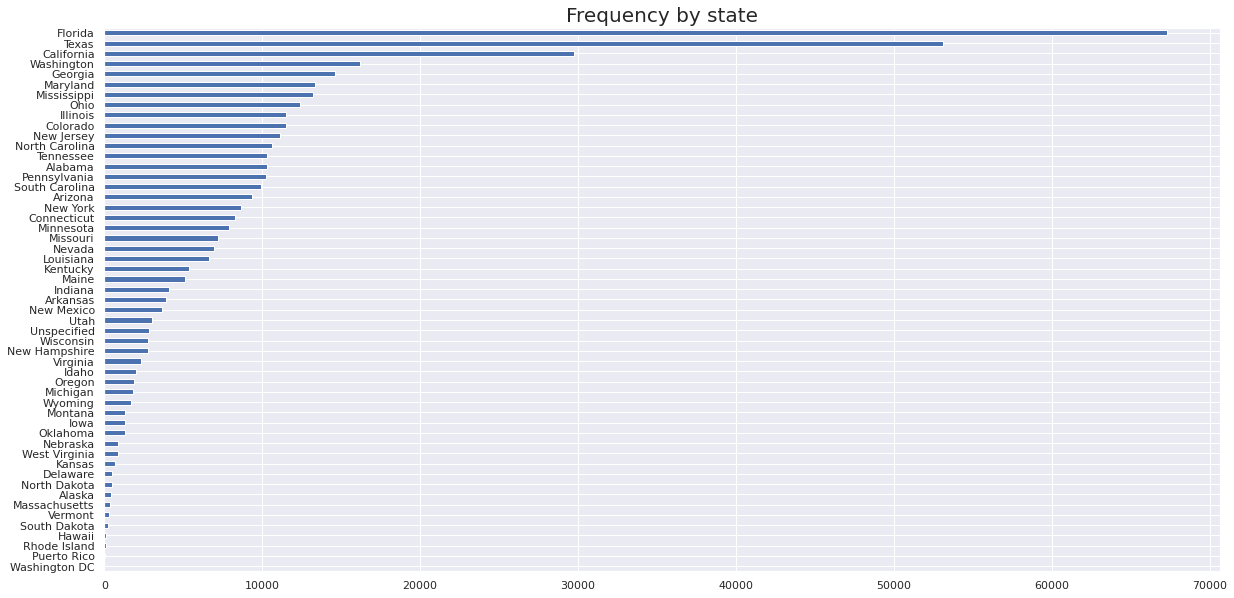

In [32]:
plt.figure(figsize=(20,10))
df.state.value_counts().sort_values().plot(kind='barh')
plt.title('Frequency by state', fontsize=20)

Text(0.5, 1.0, 'price by state with usageband')

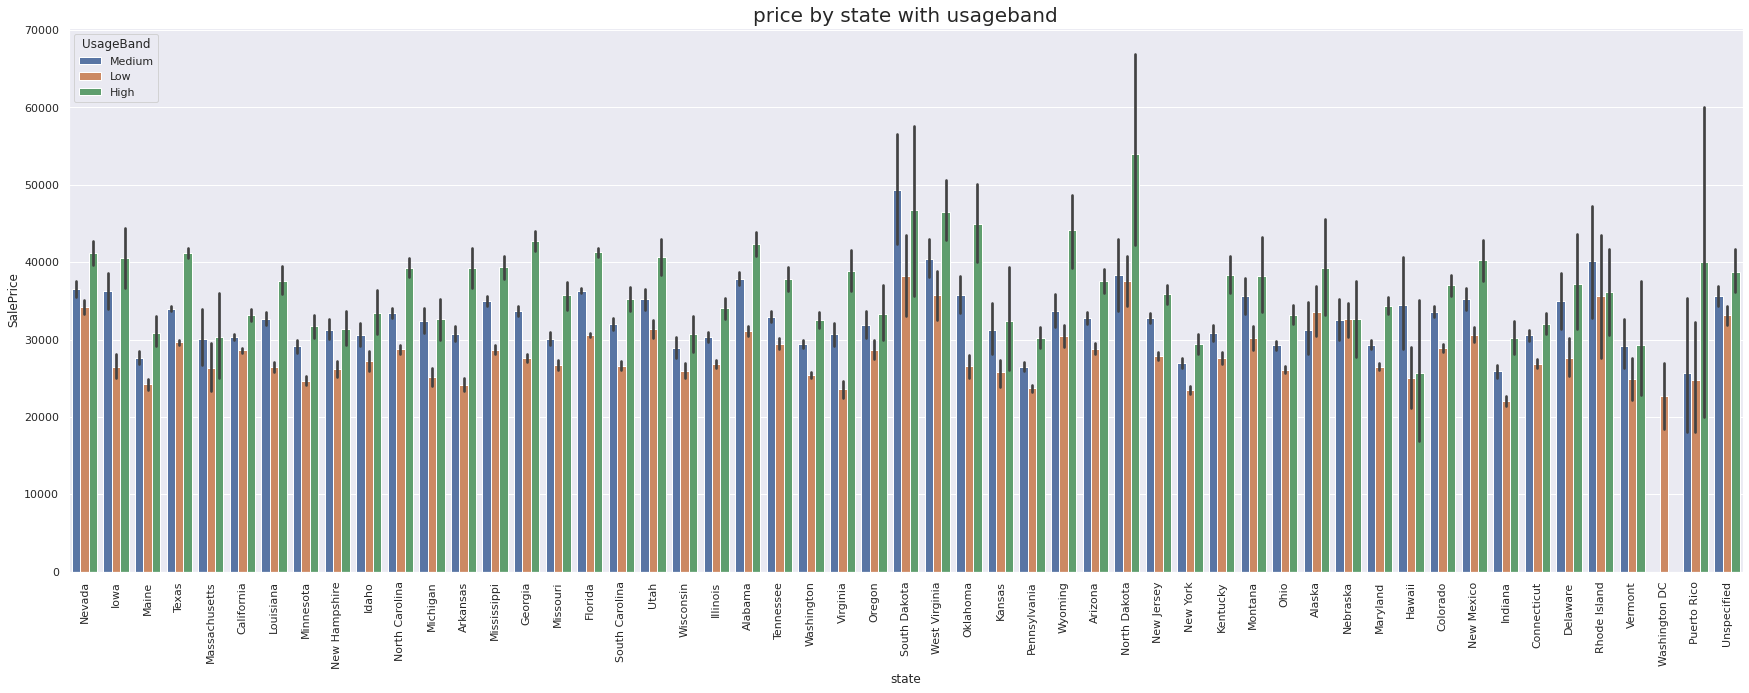

In [33]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice',hue='UsageBand')
plt.title('price by state with usageband', fontsize=20)

Text(0.5, 1.0, 'price change by state')

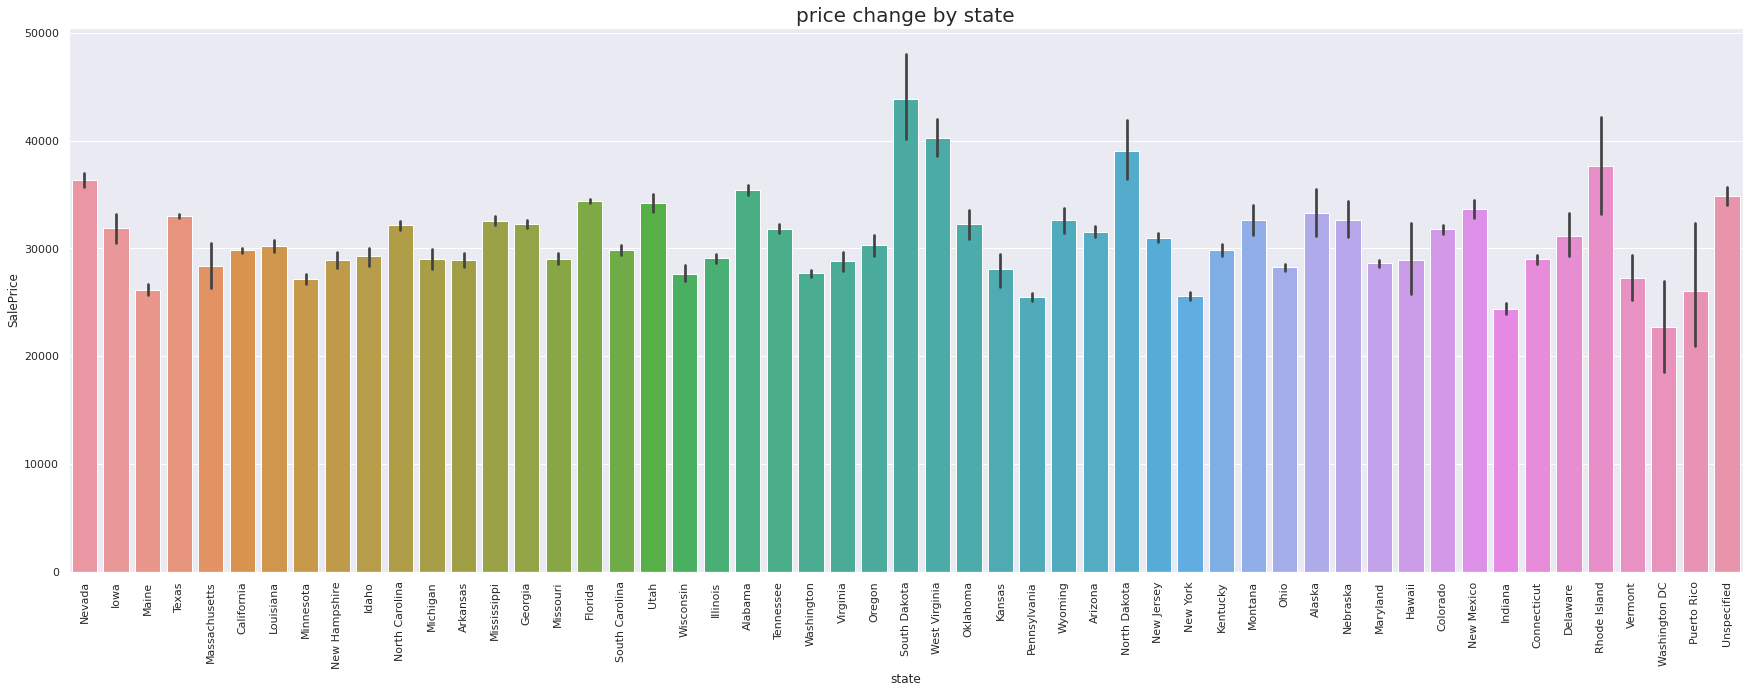

In [34]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice')
plt.title('price change by state', fontsize=20)

Text(0.5, 1.0, 'price change by state with productgroup')

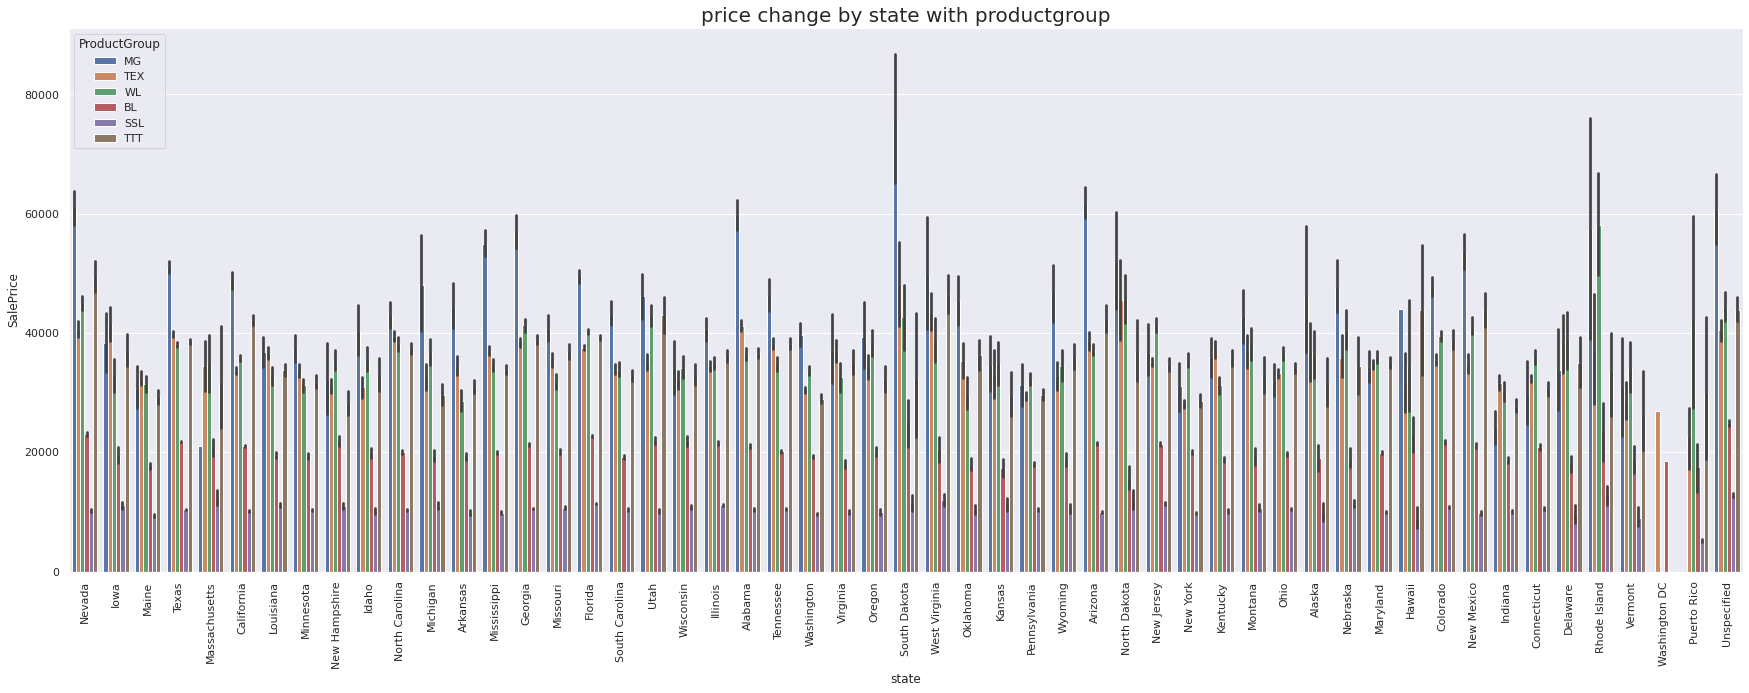

In [35]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice',hue='ProductGroup')
plt.title('price change by state with productgroup', fontsize=20)

Text(0.5, 1.0, 'change in price over date')

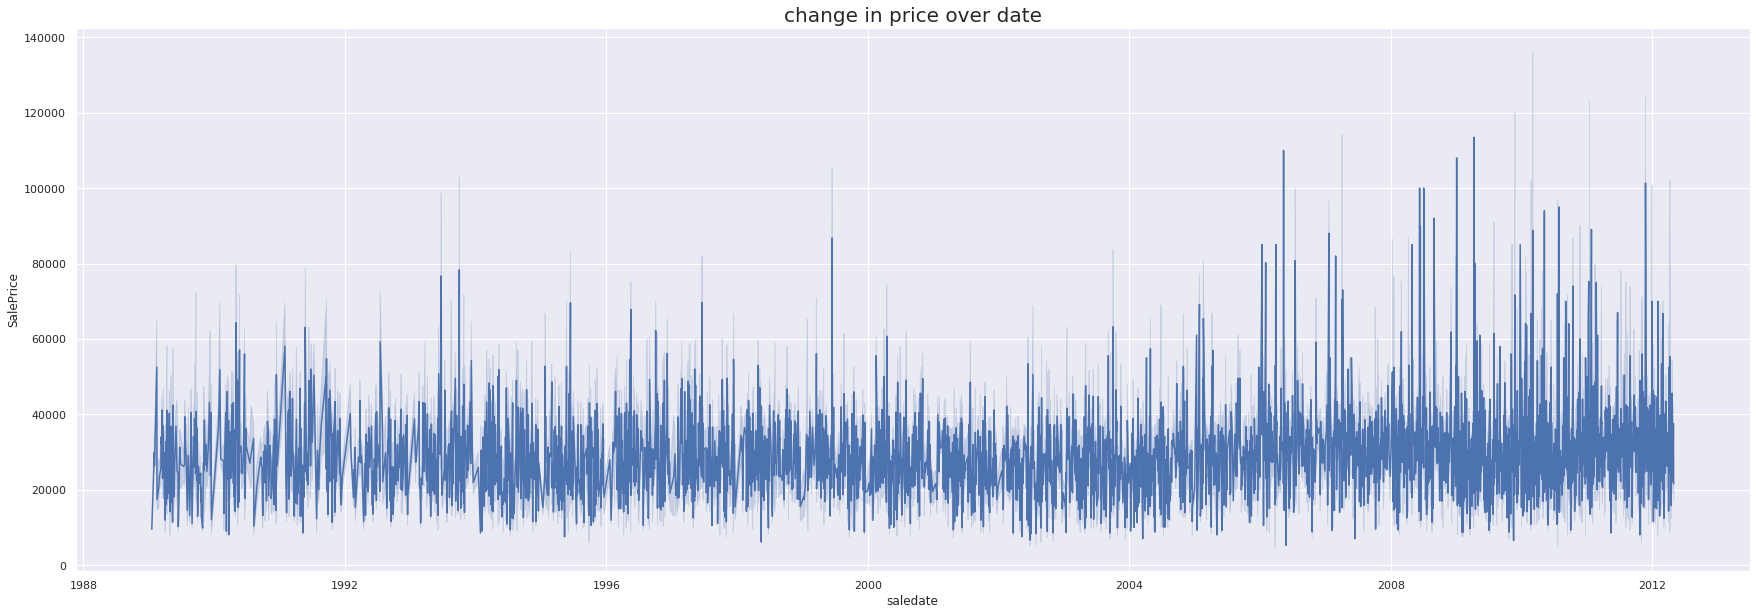

In [36]:
# convert to datetime
df['saledate']=df.saledate.astype('datetime64')
plt.figure(figsize=(30,10))
sns.lineplot(data=df,x='saledate',y='SalePrice')
plt.title('change in price over date', fontsize=20)

In [37]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear

In [38]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],

In [39]:
df.ProductGroupDesc

21             Motor Graders
22          Track Excavators
23              Wheel Loader
24           Backhoe Loaders
25        Skid Steer Loaders
                 ...        
412693      Track Excavators
412694      Track Excavators
412695      Track Excavators
412696      Track Excavators
412697      Track Excavators
Name: ProductGroupDesc, Length: 412677, dtype: object

In [40]:
df.fiModelSeries.nunique()

129

In [41]:
del df['ProductGroupDesc']
del df['fiProductClassDesc']
del df['fiSecondaryDesc']
del df['fiBaseModel']
del df['auctioneerID']
del df['datasource']
del df['SalesID']
del df['MachineID']
del df['ModelID']
del df['saledate']

## spliting into label and feature

In [42]:
x,y=df[:round(len(df)*0.6)].drop('SalePrice',axis=1),df[:round(len(df)*0.6)]['SalePrice']

In [43]:
x=pd.get_dummies(x)
x

,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,UsageBand_High,UsageBand_Low,UsageBand_Medium,...,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Differential_Type_Limited Slip,Differential_Type_No Spin,Differential_Type_Standard,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel
21,1000,16328.0,2006,10,19,3,292,0,0,1,...,1,0,0,0,1,0,1,0,0,0
22,2005,109.0,2007,10,25,3,298,0,1,0,...,1,0,0,0,1,0,1,0,0,0
23,1996,17033.0,2006,10,19,3,292,1,0,0,...,1,0,0,0,1,0,1,0,0,0
24,2001,1877.0,2004,5,20,3,141,0,0,1,...,1,0,0,0,1,0,1,0,0,0
25,2003,1028.0,2006,3,9,3,68,0,0,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247622,1997,5914.0,2006,6,15,3,166,1,0,0,...,1,0,0,0,1,0,1,0,0,0
247623,1997,5914.0,2006,3,1,2,60,1,0,0,...,1,0,0,0,1,0,1,0,0,0
247624,1000,5914.0,2007,3,28,2,87,1,0,0,...,1,0,0,0,1,0,1,0,0,0
247625,1996,5914.0,2002,6,27,3,178,1,0,0,...,1,0,0,0,1,0,1,0,0,0


## Train Test Split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Modelling

In [45]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)
model=model.fit(x_train,y_train)

In [46]:
model.score(x_train,y_train)

0.8292968115746329

In [47]:
y_pred=model.predict(x_test)

## Model Evaluation

In [48]:
print(f'R^2: {r2_score(y_test,y_pred).round(2)*100}%')
print(f'mean squared error: {mean_squared_error(y_test,y_pred)}')
print(f'mean absolute error: {mean_absolute_error(y_test,y_pred)}')

R^2: 81.0%
mean squared error: 94229954.04196271
mean absolute error: 6187.609329725509
